In [31]:
def _convolve_channel(channel, kernel):
    channel_height, channel_width = channel.shape
    kernel_height, kernel_width = kernel.shape

    new_channel = np.zeros((channel_height - kernel_height + 1, channel_width - kernel_width + 1))

    for i in range(new_channel.shape[0]):
        for j in range(new_channel.shape[1]):
            # Extract the region of the channel that corresponds to the kernel
            region = channel[i:i+kernel_height, j:j+kernel_width]
            
            # Perform element-wise multiplication and sum the result
            new_channel[i, j] = np.sum(region * kernel)

    return new_channel


def convolve_im(im, kernel):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    # YOUR CODE HERE
    #new_image = im.copy() # You can remove this line
    R, G, B = im[:, :, 0], im[:, :, 1], im[:, :, 2]

    kernel = np.flip(kernel)

    R = _convolve_channel(R, kernel)
    G = _convolve_channel(G, kernel)
    B = _convolve_channel(B, kernel)

    new_image = np.stack([R, G, B], axis=2)

    return new_image

In [34]:
import numpy as np

def _convolve_channel(channel, kernel):
    channel_height, channel_width = channel.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_channel = np.pad(channel, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    new_channel = np.zeros_like(channel)

    for i in range(channel_height):
        for j in range(channel_width):
            # Extract the region of the padded channel that corresponds to the kernel
            region = padded_channel[i:i+kernel_height, j:j+kernel_width]
            
            # Perform element-wise multiplication and sum the result
            new_channel[i, j] = np.sum(region * kernel)

    return new_channel

def convolve_im(im, kernel):
    """ A function that convolves im with kernel, returning the same size image, with zero-padding when kernel goes out of bounds.

    Args:
        im (np.array): np.array of shape [H, W, 3]
        kernel (np.array): np.array of shape [K, K]
    Returns:
        np.array: np.array of shape [H, W, 3] (same shape as input image)
    """
    R, G, B = im[:, :, 0], im[:, :, 1], im[:, :, 2]

    kernel = np.flip(kernel, (0, 1))

    R_convolved = _convolve_channel(R, kernel)
    G_convolved = _convolve_channel(G, kernel)
    B_convolved = _convolve_channel(B, kernel)

    new_image = np.stack([R_convolved, G_convolved, B_convolved], axis=2)

    return new_image


In [ ]:
"""
1. Assume the size of the kernel is odd numbered
2. You must implement the convolution operation yourself from scratch using numpy.
3. You can return zero in cases when the convolutional kernel goes outside the original image)
4. To convolve a color image, convolve each channel separately and concatenate them afterward.
"""

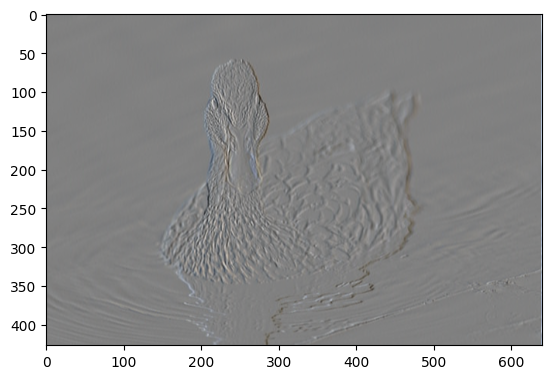

In [35]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

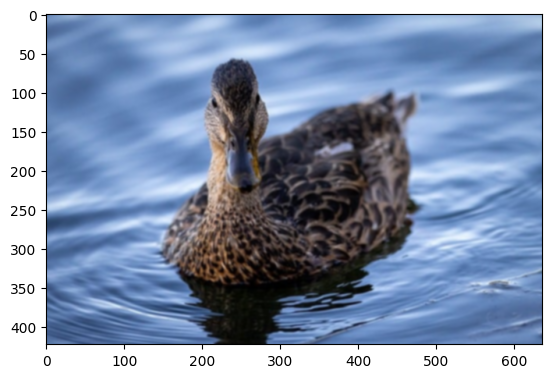

In [33]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)